In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('/content/Online Retail(Online Retail).csv', encoding= 'latin-1')

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [105]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [106]:
df.shape

(541909, 8)

In [107]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [108]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [109]:
df = df.dropna(subset=['Description', 'CustomerID'])
df.reset_index(drop=True, inplace=True)

In [110]:
df.shape

(406829, 8)

In [111]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [112]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

/tmp/ipython-input-112-4286954847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [114]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

/tmp/ipython-input-114-1859189470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [115]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.shape

(397884, 9)

In [116]:
df['CustomerID'].nunique()

4338

In [117]:
TopCustomers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
TopCustomers

,TotalPrice
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
...,...
16878.0,13.30
17956.0,12.75
16454.0,6.90


In [118]:
AvgOrderValue = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
AvgOrderValue

np.float64(480.86595639974104)

In [119]:
CntrySalesDistri = df.groupby('Country')['TotalPrice'].sum()
CntrySalesDistri


,TotalPrice
Country,
Australia,138521.310
Austria,10198.680
Bahrain,548.400
Belgium,41196.340
Brazil,1143.600
Canada,3666.380
Channel Islands,20450.440
Cyprus,13590.380
Czech Republic,826.740


In [120]:
OrdersPerCustomer = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
OrdersPerCustomer


,InvoiceNo
CustomerID,
12748.0,209
14911.0,201
17841.0,124
13089.0,97
14606.0,93
...,...
18213.0,1
18215.0,1
18269.0,1


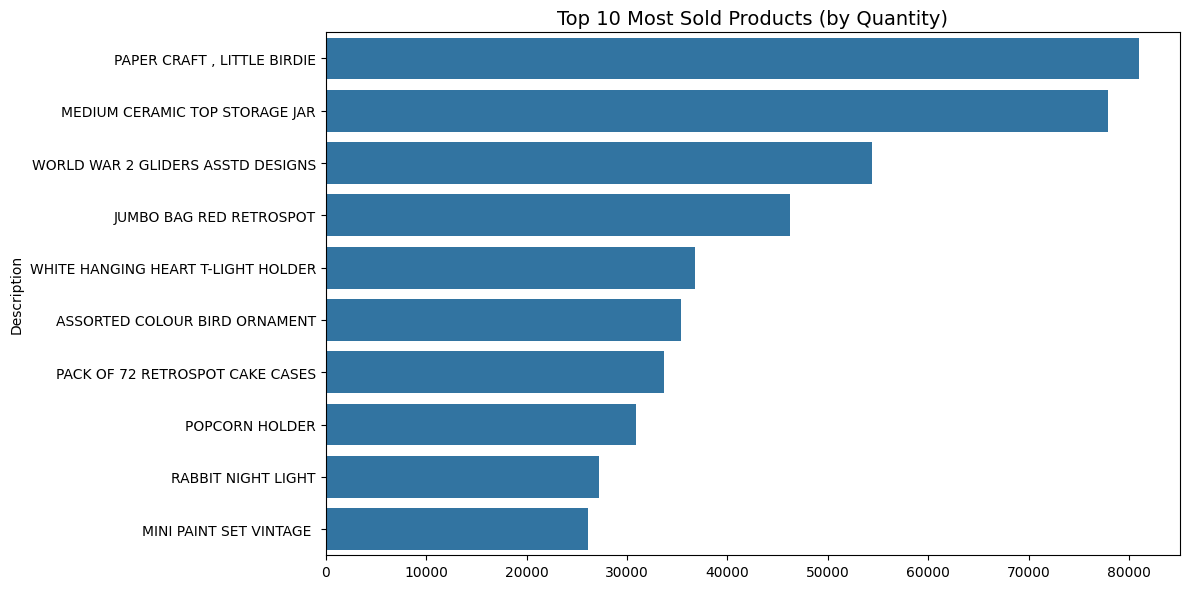

In [121]:
topProductsQty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=topProductsQty.values, y=topProductsQty.index)
plt.title('Top 10 Most Sold Products (by Quantity)', fontsize=14)
plt.tight_layout()
plt.show()


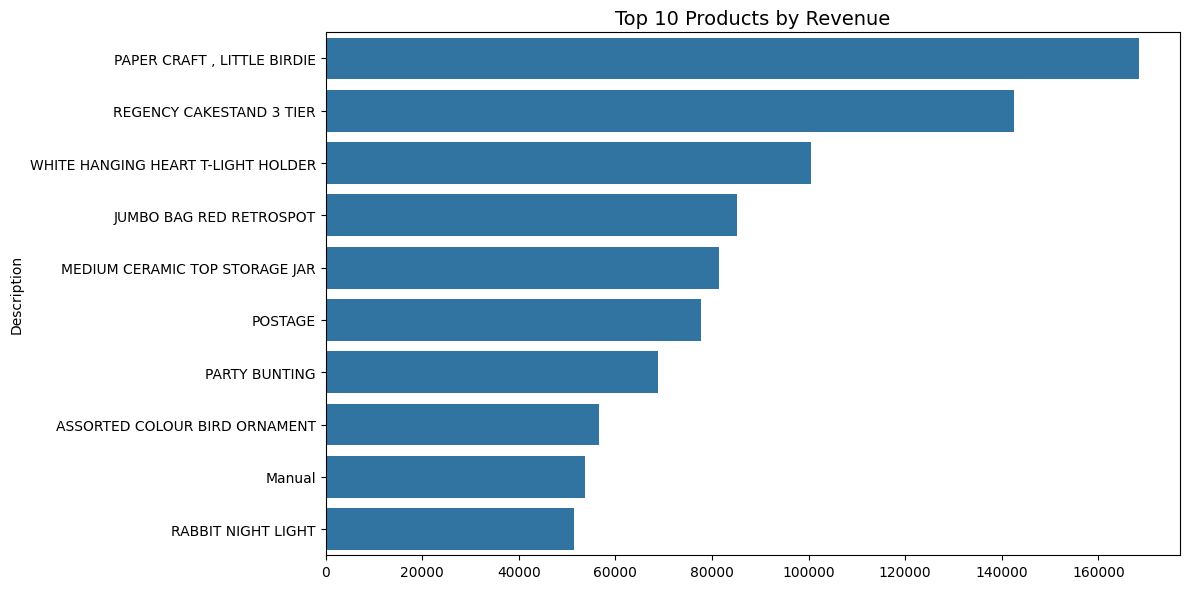

In [122]:
topProductRev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=topProductRev.values, y=topProductRev.index)
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.tight_layout()
plt.show()


In [123]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

df[['InvoiceDate', 'Year', 'Month', 'DayOfWeek', 'Hour']]


,InvoiceDate,Year,Month,DayOfWeek,Hour
0,2010-12-01 08:26:00,2010,12,Wednesday,8
1,2010-12-01 08:26:00,2010,12,Wednesday,8
2,2010-12-01 08:26:00,2010,12,Wednesday,8
3,2010-12-01 08:26:00,2010,12,Wednesday,8
4,2010-12-01 08:26:00,2010,12,Wednesday,8
...,...,...,...,...,...
406824,2011-12-09 12:50:00,2011,12,Friday,12
406825,2011-12-09 12:50:00,2011,12,Friday,12
406826,2011-12-09 12:50:00,2011,12,Friday,12
406827,2011-12-09 12:50:00,2011,12,Friday,12


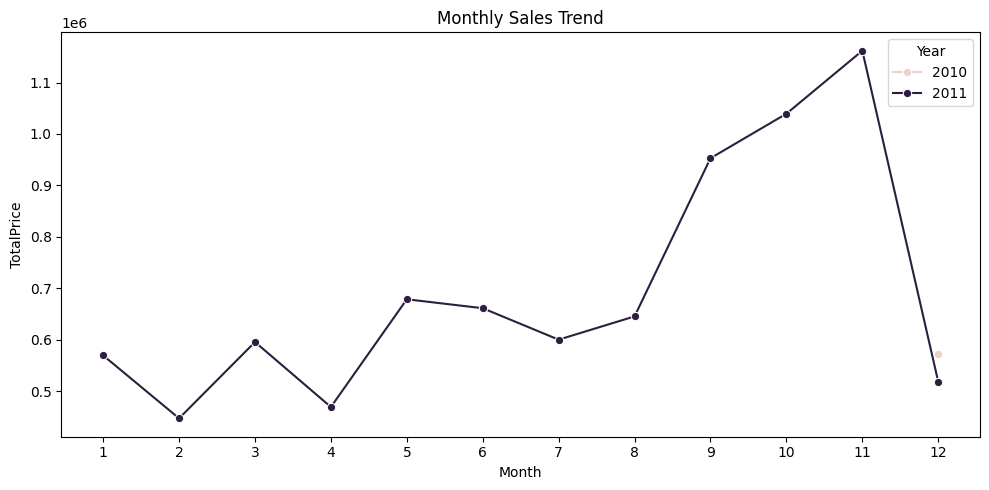

In [124]:
MonthlySales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=MonthlySales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


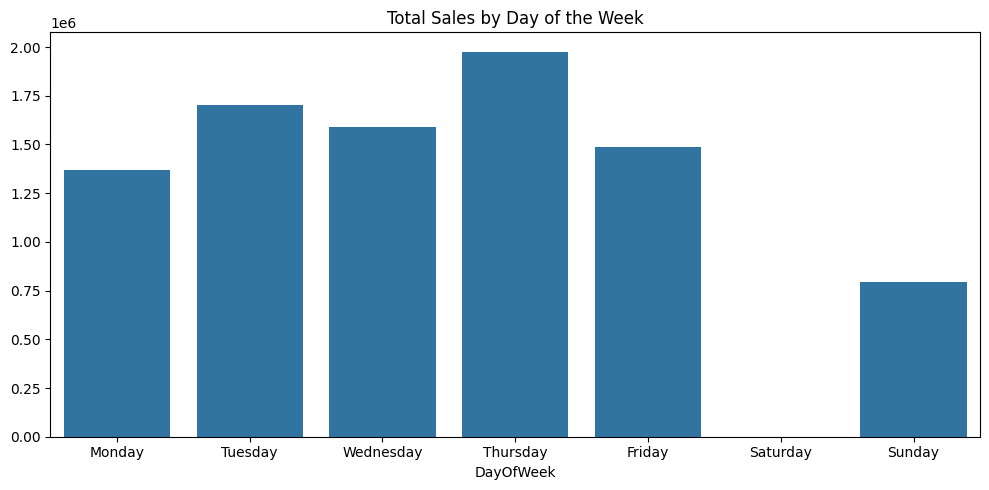

In [125]:
DayOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
WeekdaySales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(DayOrder)

plt.figure(figsize=(10,5))
sns.barplot(x=WeekdaySales.index, y=WeekdaySales.values)
plt.title('Total Sales by Day of the Week')
plt.tight_layout()
plt.show()


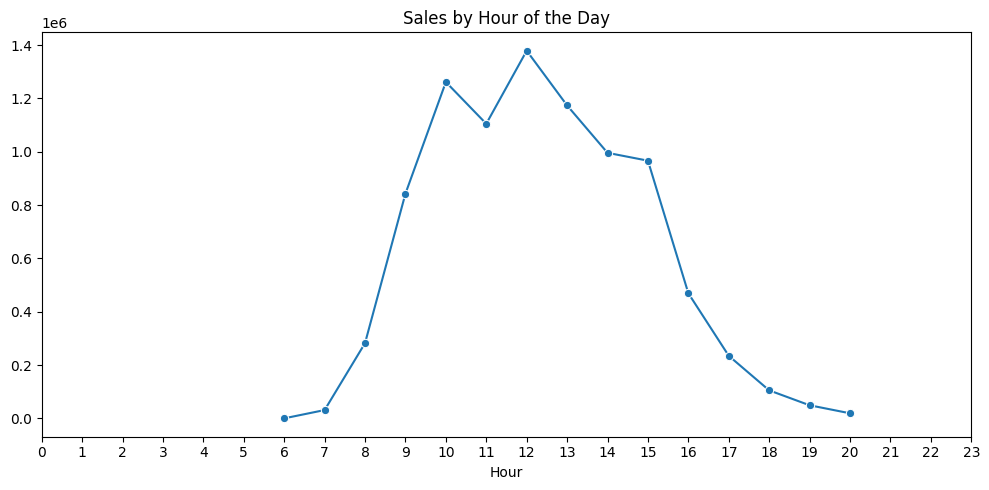

In [126]:
HourlySales = df.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=HourlySales.index, y=HourlySales.values, marker='o')
plt.title('Sales by Hour of the Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()
